**notebook version**: `3` (4 Jul 2024)  
**new in this version**: added check if downloaded data is indeed in 30MIN time resolution

- This notebook can be used to download data from the database `InfluxDB`
- Data are stored to a `.csv` file in this folder

Data used in the manuscript https://doi.org/10.1016/j.agrformet.2023.109613.

# **Auto-settings**

## Data settings

In [1]:
DIRCONF = r'F:\Sync\luhk_work\20 - CODING\22 - POET\configs'
# DIRCONF = r'P:\Flux\RDS_calculations\_scripts\_configs\configs'  # Folder with configuration files: needed e.g. for connection to database
TIMEZONE_OFFSET_TO_UTC_HOURS = 1  # Timezone, e.g. "1" is translated to timezone "UTC+01:00" (CET, winter time)
REQUIRED_TIME_RESOLUTION = '30min'  # 30MIN time resolution

## Imports

In [2]:
import importlib.metadata
from datetime import datetime

%matplotlib inline
import seaborn as sns
from pathlib import Path
from diive.core.io.files import save_parquet

sns.set_theme('notebook')
from dbc_influxdb import dbcInflux
from diive.core.plotting.heatmap_datetime import HeatmapDateTime
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")
version_dbc = importlib.metadata.version("dbc_influxdb")
print(f"dbc-influxdb version: v{version_dbc}")
dbc = dbcInflux(dirconf=DIRCONF)  # Connect to database

diive version: v0.80.0
dbc-influxdb version: v0.12.0
Reading configuration files was successful.
Connection to database works.


</br>

# **DOWNLOAD** Data from Feigenwinter et al., 2023 (2005-2020)
- Explore data online [here](https://dataviews.swissfluxnet.ethz.ch/d/aed0b303-0f4c-4e51-93a9-3c4ac343e77d/dataset3a-manuscript-feigenwinter-et-al-2023a?orgId=1)
- Manuscript: https://doi.org/10.1016/j.agrformet.2023.109613
- Download data from ETH Research Collection: https://doi.org/10.3929/ethz-b-000524199
- Assembling meteo data from Feigenwinter et al. (2023) for years between 2005 and 2020
- Using newly screened data from the database for the years between 2021 and 2023

In [3]:
%%time
data_simple_fw23, data_detailed_fw23, assigned_measurements_fw23 = dbc.download(
    bucket=f'ch-cha_processed',
    measurements=['G', 'TA', 'RH', 'LW', 'PPFD', 'SW', 'PA', 'PREC', 'SWC', 'TS'],
    fields=['G_0.03', 'LW_IN', 'LW_OUT', 'PA', 'PA_SOURCE', 'PPFD_IN', 'PREC_RAIN', 'PREC_RAIN_SOURCE', 'RH', 'RH_SOURCE', 'SW_IN', 'SW_IN_SOURCE', 'SW_OUT',
            'SWC_0.05', 'SWC_0.15', 'SWC_0.75', 'TA', 'TA_SOURCE', 'TS_0.04', 'TS_0.15', 'TS_0.4'],
    start='2005-01-01 00:00:01',  # Download data starting with this date (the start date itself IS included),
    stop='2021-01-01 00:00:01',  # Download data before this date (the stop date itself IS NOT included),
    timezone_offset_to_utc_hours=TIMEZONE_OFFSET_TO_UTC_HOURS,
    data_version='ms_feigenwinter2023a'
)


DOWNLOADING
    from bucket ch-cha_processed
    variables ['G_0.03', 'LW_IN', 'LW_OUT', 'PA', 'PA_SOURCE', 'PPFD_IN', 'PREC_RAIN', 'PREC_RAIN_SOURCE', 'RH', 'RH_SOURCE', 'SW_IN', 'SW_IN_SOURCE', 'SW_OUT', 'SWC_0.05', 'SWC_0.15', 'SWC_0.75', 'TA', 'TA_SOURCE', 'TS_0.04', 'TS_0.15', 'TS_0.4']
    from measurements ['G', 'TA', 'RH', 'LW', 'PPFD', 'SW', 'PA', 'PREC', 'SWC', 'TS']
    from data version ms_feigenwinter2023a
    between 2005-01-01 00:00:01 and 2021-01-01 00:00:01
    with timezone offset to UTC of 1
Used querystring: from(bucket: "ch-cha_processed") |> range(start: 2005-01-01T00:00:01+01:00, stop: 2021-01-01T00:00:01+01:00) |> filter(fn: (r) => r["_measurement"] == "G" or r["_measurement"] == "TA" or r["_measurement"] == "RH" or r["_measurement"] == "LW" or r["_measurement"] == "PPFD" or r["_measurement"] == "SW" or r["_measurement"] == "PA" or r["_measurement"] == "PREC" or r["_measurement"] == "SWC" or r["_measurement"] == "TS") |> filter(fn: (r) => r["data_version"] == "

In [4]:
data_simple_fw23

,G_0.03,LW_IN,LW_OUT,PA,PA_SOURCE,PPFD_IN,PREC_RAIN,PREC_RAIN_SOURCE,RH,RH_SOURCE,SWC_0.05,SWC_0.15,SWC_0.75,SW_IN,SW_IN_SOURCE,SW_OUT,TA,TA_SOURCE,TS_0.04,TS_0.15,TS_0.4
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:30:00,NaN,NaN,NaN,978.100000,1.0,NaN,0.0,1.0,85.400000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,977.933333,1.0,NaN,0.0,1.0,85.700000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.533333,3.0,NaN,NaN,NaN
2005-01-01 01:30:00,NaN,NaN,NaN,977.900000,1.0,NaN,0.1,1.0,86.600000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 02:00:00,NaN,NaN,NaN,977.833333,1.0,NaN,0.0,1.0,89.600000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 02:30:00,NaN,NaN,NaN,977.833333,1.0,NaN,0.1,1.0,91.433333,1.0,NaN,NaN,NaN,0.0,3.0,NaN,1.500000,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 22:00:00,-5.246918,327.0590,305.8658,958.613800,0.0,0.012177,0.0,0.0,100.000000,0.0,43.15512,37.83649,42.34799,0.0,0.0,-13.17378,-0.059646,0.0,7.059905,4.751553,5.665280
2020-12-31 22:30:00,-5.688780,325.6822,299.9425,958.361800,0.0,0.015688,0.0,0.0,100.000000,0.0,43.14826,37.83116,42.34475,0.0,0.0,-14.05419,-0.747990,0.0,7.037867,4.753286,5.666638
2020-12-31 23:00:00,-6.256253,325.8016,303.5924,958.257100,0.0,0.015338,0.0,0.0,100.000000,0.0,43.14190,37.82694,42.34330,0.0,0.0,-13.52161,-0.606677,0.0,7.021161,4.754451,5.668180


## Plot downloaded data

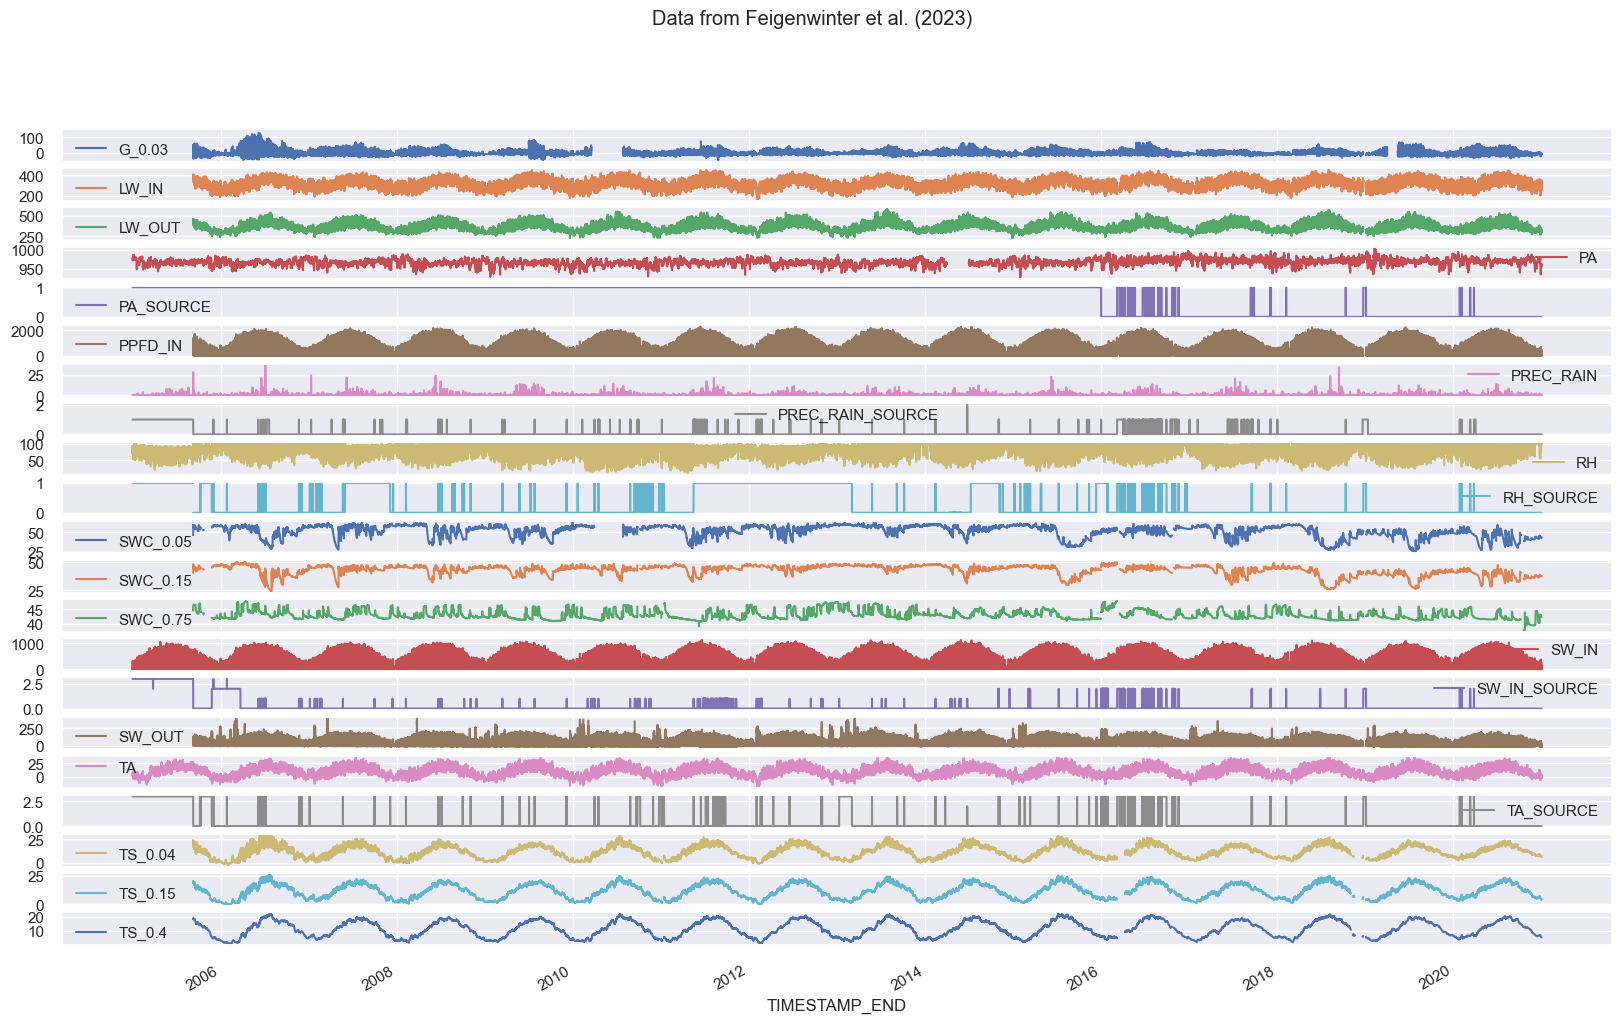

In [5]:
data_simple_fw23.plot(subplots=True, x_compat=True, title="Data from Feigenwinter et al. (2023)", figsize=(20, 12));

</br>

# **RENAME VARIABLES** to group convention

In [23]:
renaming_dict = {
    'G_0.03': 'G_GF1_0.03_1',
    'LW_IN': 'LW_IN_T1_2_1',
    'LW_OUT': 'LW_OUT_T1_2_1',
    'PA': 'PA_GF1_0.9_1',
    'PA_SOURCE': 'FLAG_PA_GF1_0.9_1_ISFILLED',  # units: "0=measured; 1=MeteoSwiss CHZ"
    'PPFD_IN': 'PPFD_IN_T1_2_2',
    'PREC_RAIN': 'PREC_RAIN_TOT_GF1_0.5_1',
    'PREC_RAIN_SOURCE': 'FLAG_PREC_RAIN_TOT_GF1_0.5_1_ISFILLED',  # units: "0=measured; 1=MeteoSwiss CHZ; 2=set missing value to zero"
    'RH': 'RH_T1_2_1',
    'RH_SOURCE': 'FLAG_RH_T1_2_1_ISFILLED',  # units: "0=measured; 1=MeteoSwiss CHZ; 2=running median"
    'SW_IN': 'SW_IN_T1_2_1',
    'SW_IN_SOURCE': 'FLAG_SW_IN_T1_2_1_ISFILLED',  # units: "0=measured; 1=sFillMDC; 2=MeteoSwiss CHZ; 3=MeteoSwiss WAE"
    'SW_OUT': 'SW_OUT_T1_2_1',
    'SWC_0.05': 'SWC_GF1_0.05_1',
    'SWC_0.15': 'SWC_GF1_0.15_1',
    'SWC_0.75': 'SWC_GF1_0.75_1',
    'TA': 'TA_T1_2_1',
    'TA_SOURCE': 'FLAG_TA_T1_2_1_ISFILLED',  # units: "0=measured; 1=sFillLUT_Rg; 2=sFillMDC; 3=MeteoSwiss CHZ"
    'TS_0.04': 'TS_GF1_0.04_1',
    'TS_0.15': 'TS_GF1_0.15_1',
    'TS_0.4': 'TS_GF1_0.4_1'
}
data_simple_renamed_fw23 = data_simple_fw23.copy()
data_simple_renamed_fw23 = data_simple_renamed_fw23.rename(columns=renaming_dict)
data_simple_renamed_fw23

,G_GF1_0.03_1,LW_IN_T1_2_1,LW_OUT_T1_2_1,PA_GF1_0.9_1,FLAG_PA_GF1_0.9_1_ISFILLED,PPFD_IN_T1_2_2,PREC_RAIN_TOT_GF1_0.5_1,FLAG_PREC_RAIN_TOT_GF1_0.5_1_ISFILLED,RH_T1_2_1,FLAG_RH_T1_2_1_ISFILLED,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.75_1,SW_IN_T1_2_1,FLAG_SW_IN_T1_2_1_ISFILLED,SW_OUT_T1_2_1,TA_T1_2_1,FLAG_TA_T1_2_1_ISFILLED,TS_GF1_0.04_1,TS_GF1_0.15_1,TS_GF1_0.4_1
TIMESTAMP_END,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:30:00,NaN,NaN,NaN,978.100000,1.0,NaN,0.0,1.0,85.400000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,977.933333,1.0,NaN,0.0,1.0,85.700000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.533333,3.0,NaN,NaN,NaN
2005-01-01 01:30:00,NaN,NaN,NaN,977.900000,1.0,NaN,0.1,1.0,86.600000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 02:00:00,NaN,NaN,NaN,977.833333,1.0,NaN,0.0,1.0,89.600000,1.0,NaN,NaN,NaN,3.0,3.0,NaN,1.566667,3.0,NaN,NaN,NaN
2005-01-01 02:30:00,NaN,NaN,NaN,977.833333,1.0,NaN,0.1,1.0,91.433333,1.0,NaN,NaN,NaN,0.0,3.0,NaN,1.500000,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 22:00:00,-5.246918,327.0590,305.8658,958.613800,0.0,0.012177,0.0,0.0,100.000000,0.0,43.15512,37.83649,42.34799,0.0,0.0,-13.17378,-0.059646,0.0,7.059905,4.751553,5.665280
2020-12-31 22:30:00,-5.688780,325.6822,299.9425,958.361800,0.0,0.015688,0.0,0.0,100.000000,0.0,43.14826,37.83116,42.34475,0.0,0.0,-14.05419,-0.747990,0.0,7.037867,4.753286,5.666638
2020-12-31 23:00:00,-6.256253,325.8016,303.5924,958.257100,0.0,0.015338,0.0,0.0,100.000000,0.0,43.14190,37.82694,42.34330,0.0,0.0,-13.52161,-0.606677,0.0,7.021161,4.754451,5.668180


## Plot renamed data

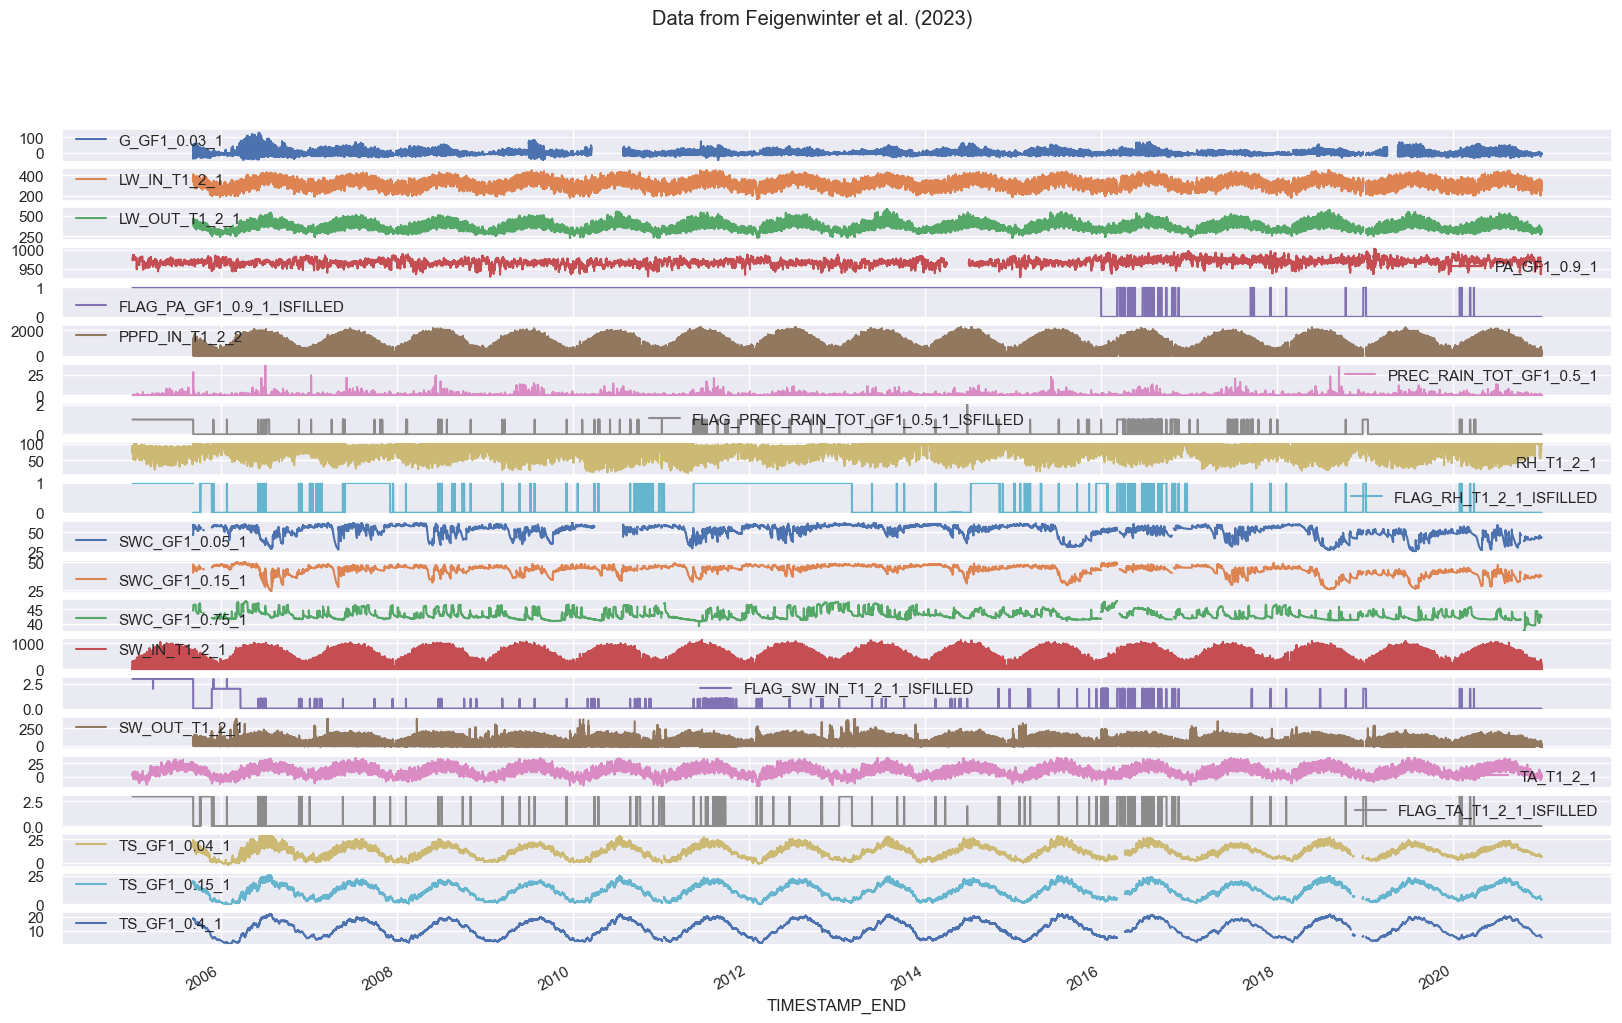

In [24]:
data_simple_renamed_fw23.plot(subplots=True, x_compat=True, title="Data from Feigenwinter et al. (2023)", figsize=(20, 12));

# **SAVE TO FILE**

In [34]:
OUTNAME = "13.1_CH-CHA_FEIGENW_meteo_2005-2020"
OUTPATH = r"F:\Sync\luhk_work\20 - CODING\29 - WORKBENCH\dataset_cha_fp2024_2005-2023\10_METEO\13_merge_meteo_for_analyses_2005-2023"
filepath = save_parquet(filename=OUTNAME, data=data_simple_renamed_fw23, outpath=OUTPATH)
data_simple_renamed_fw23.to_csv(Path(OUTPATH) / f"{OUTNAME}.csv")

Saved file F:\Sync\luhk_work\20 - CODING\29 - WORKBENCH\dataset_cha_fp2024_2005-2023\10_METEO\13_merge_meteo_for_analyses_2005-2023\13.1_CH-CHA_FEIGENW_meteo_2005-2020.parquet (0.330 seconds).


</br>

# **PLOT HEATMAPS**

F:\Sync\luhk_work\20 - CODING\21 - DIIVE\diive\diive\core\plotting\heatmap_base.py:190: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=self.figsize)


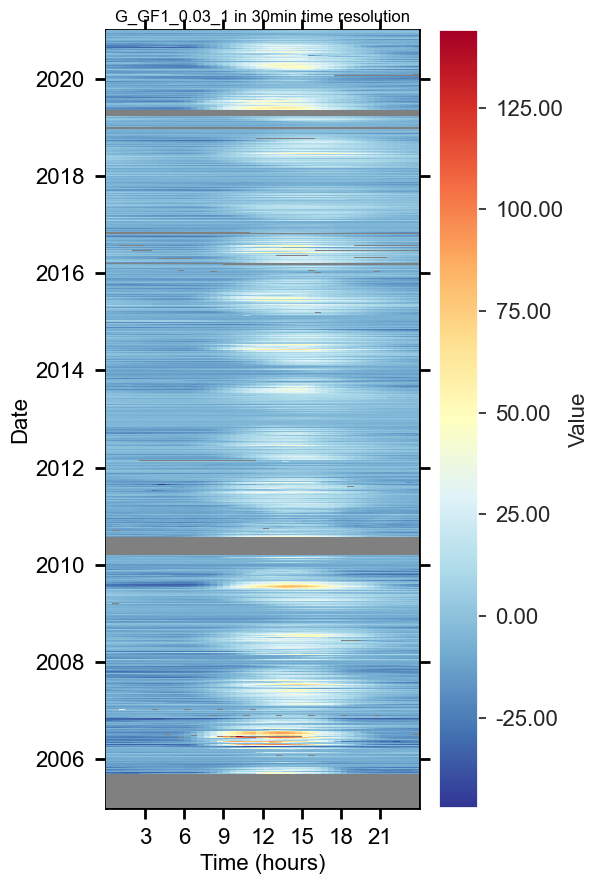

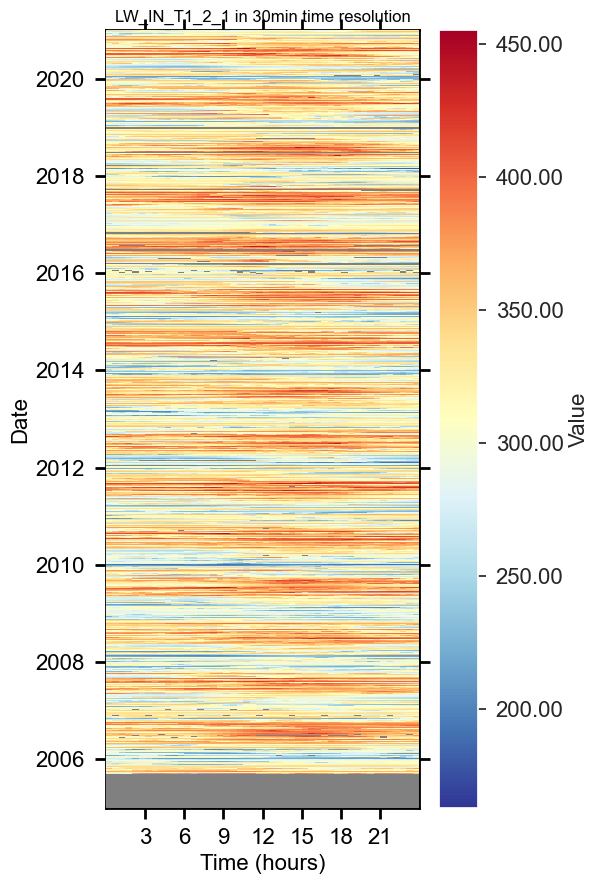

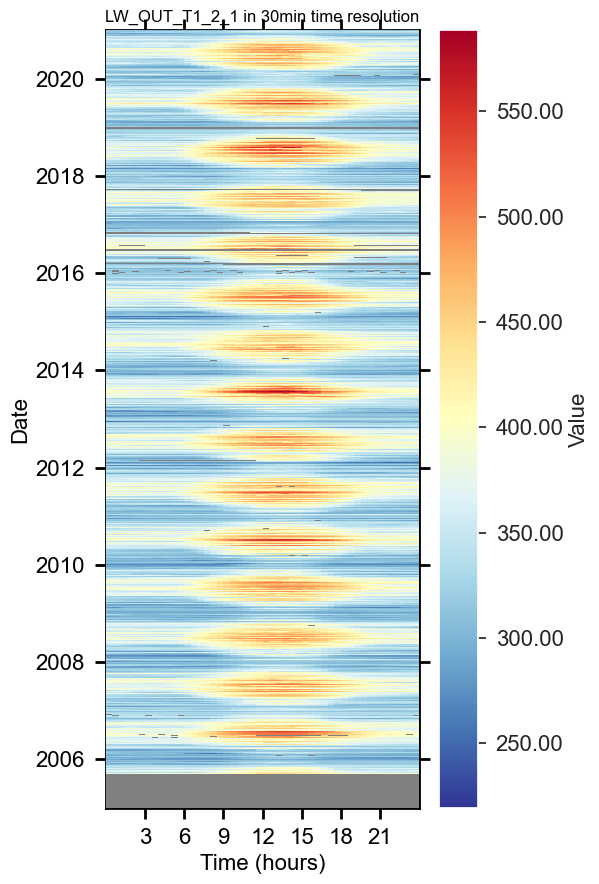

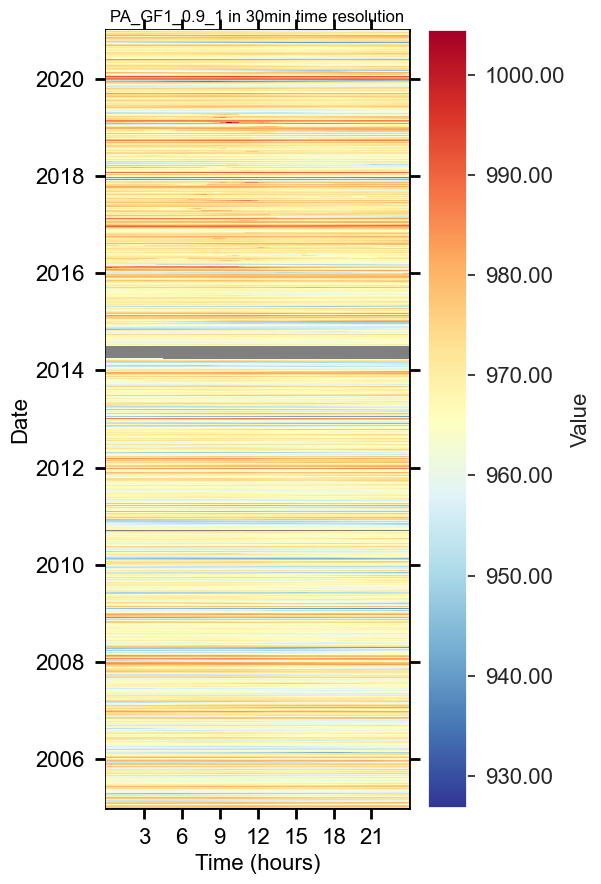

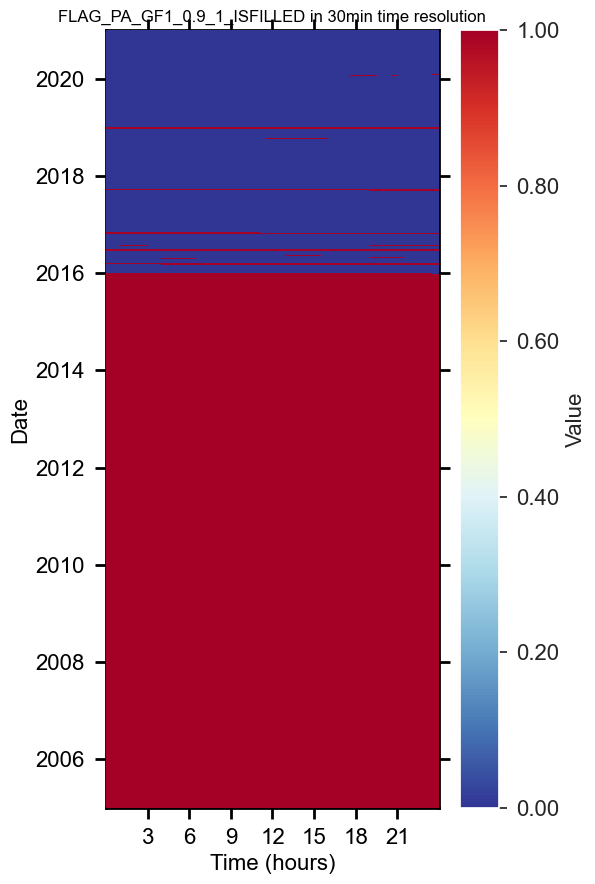

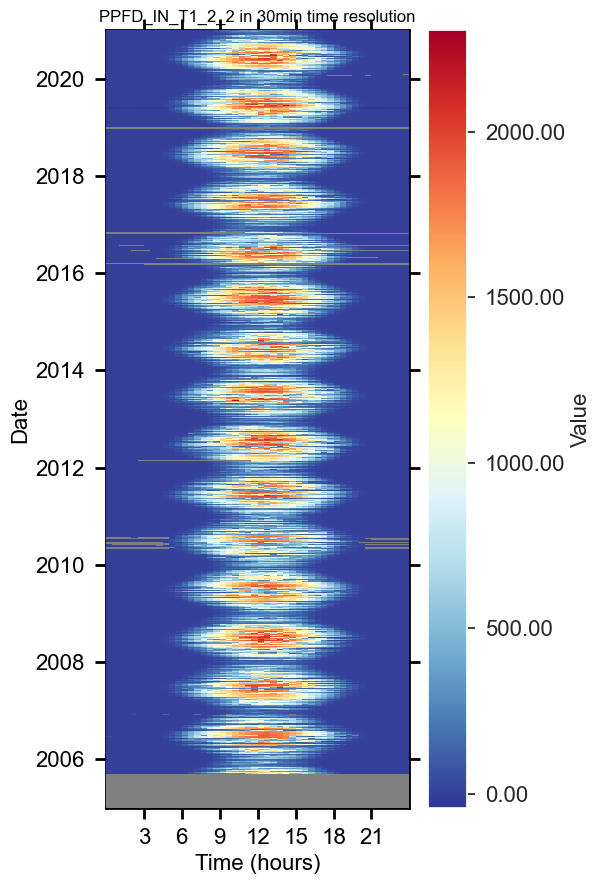

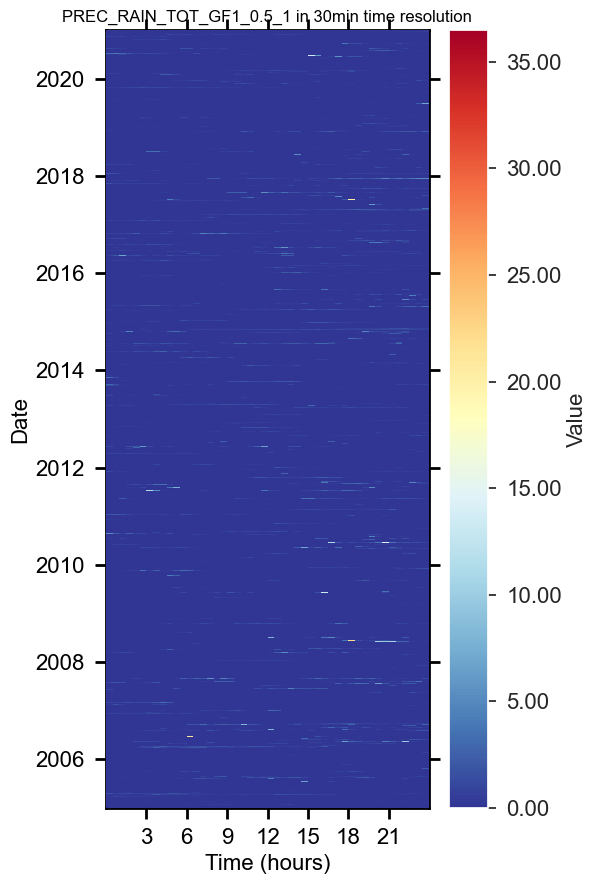

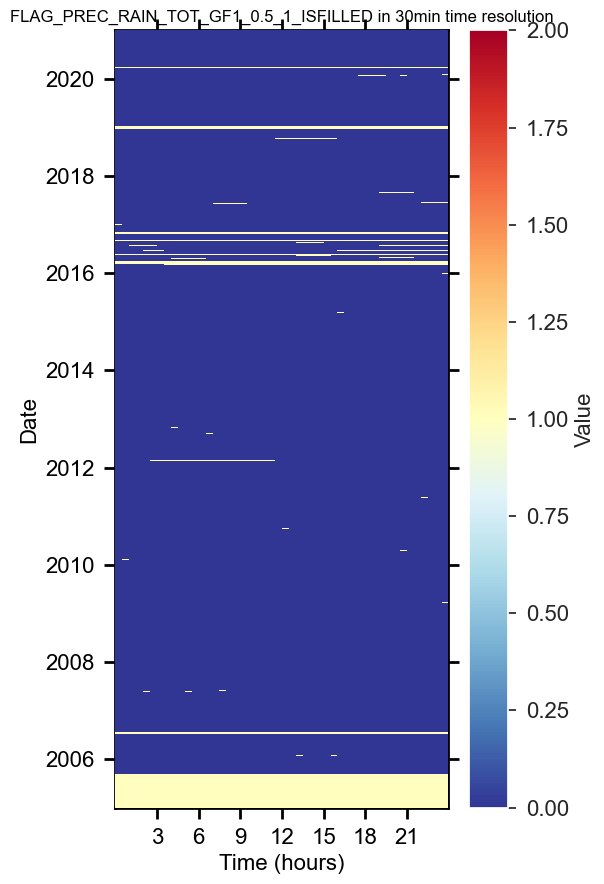

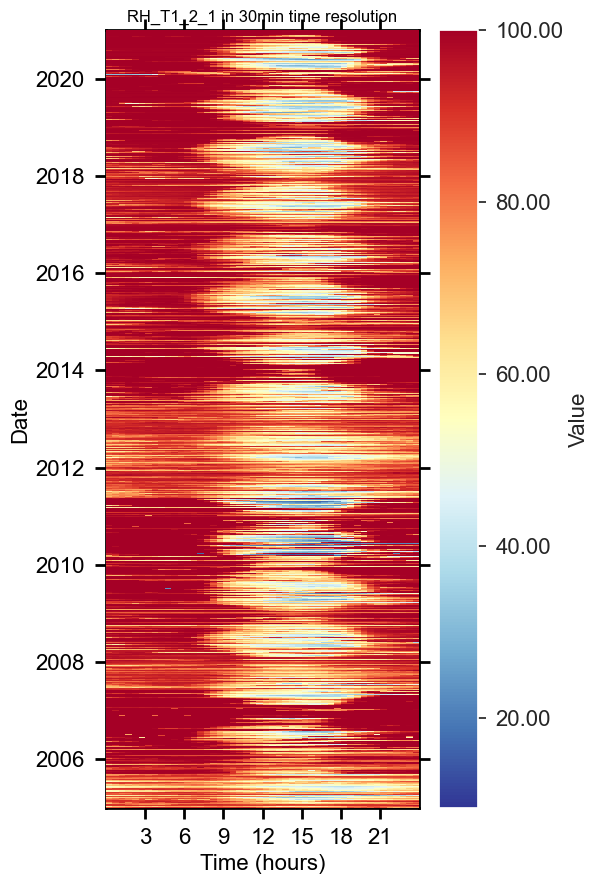

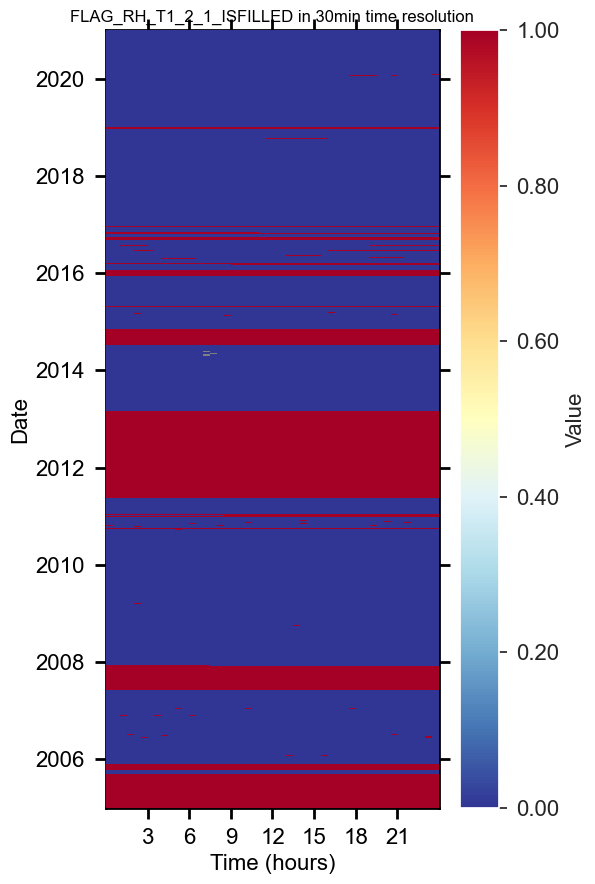

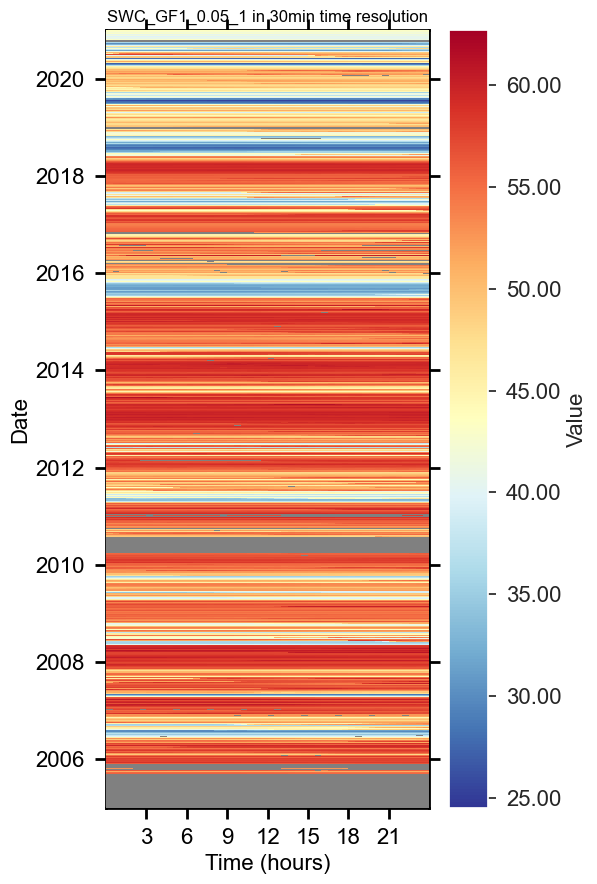

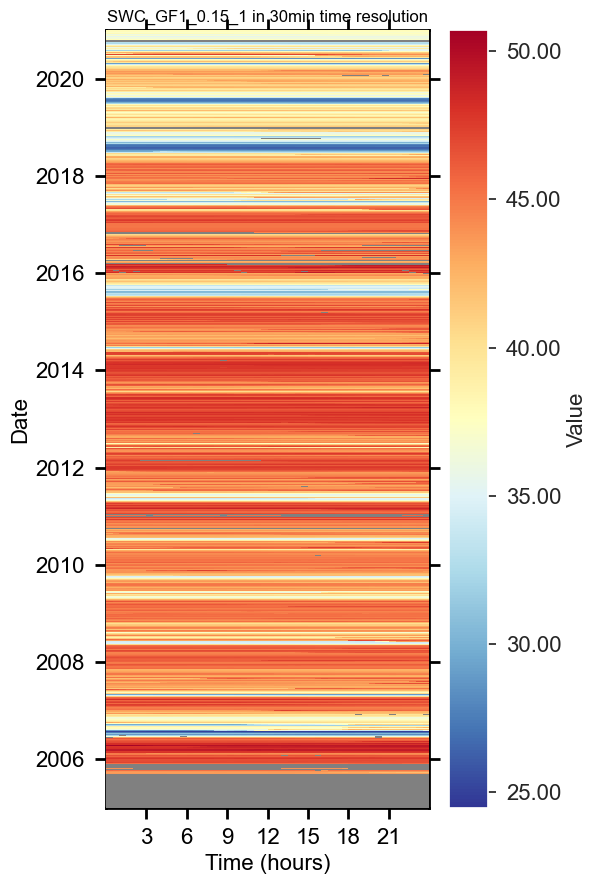

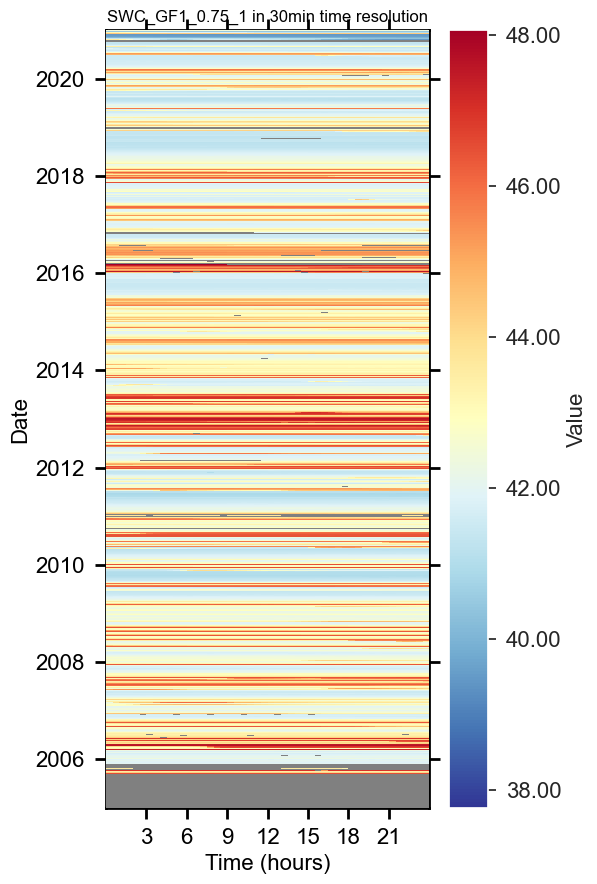

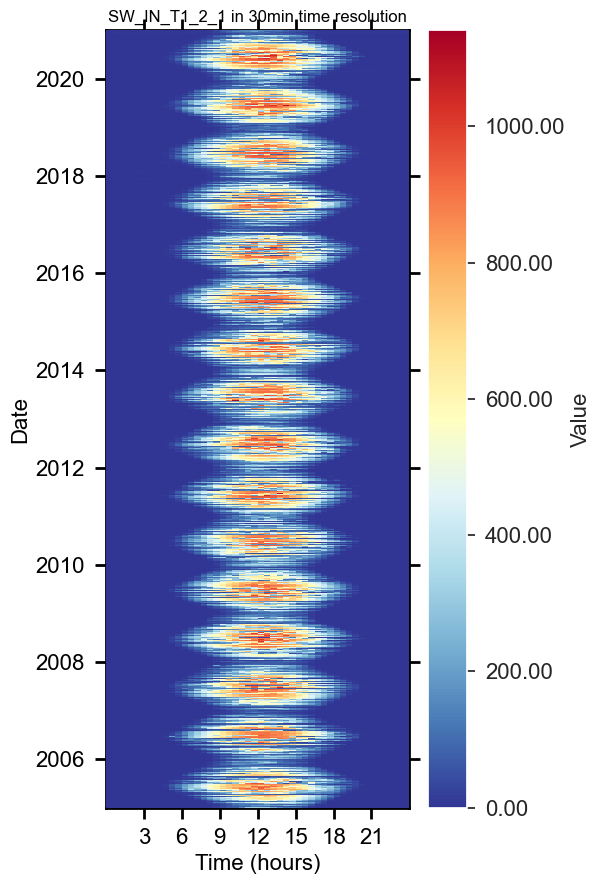

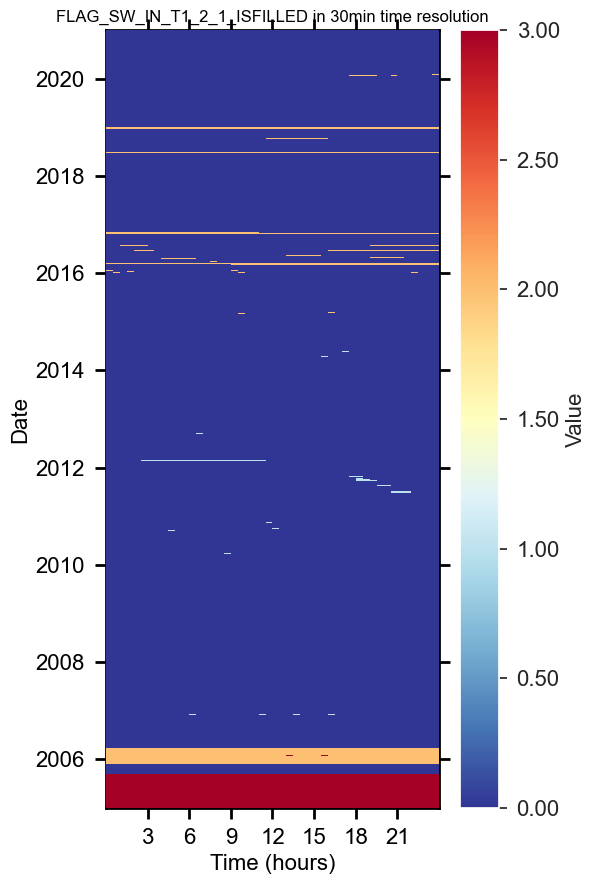

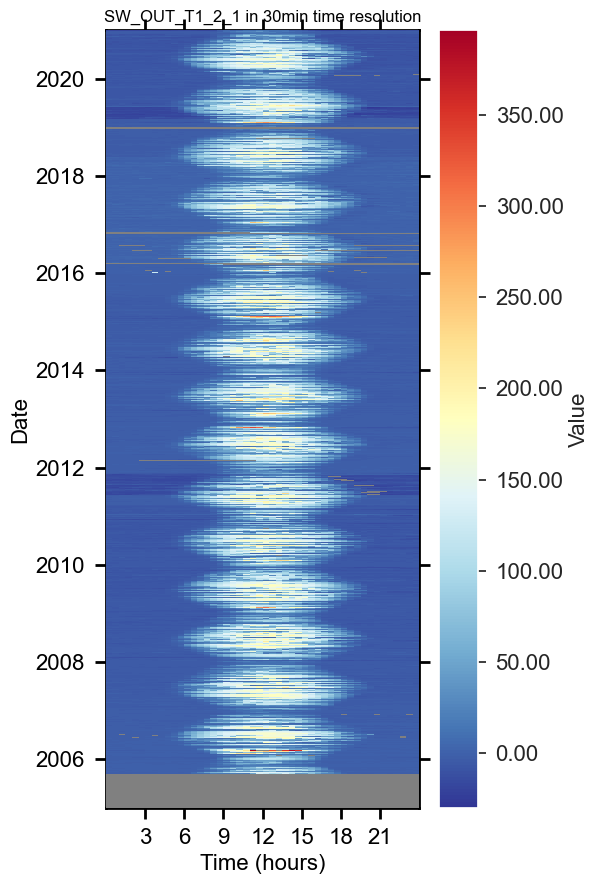

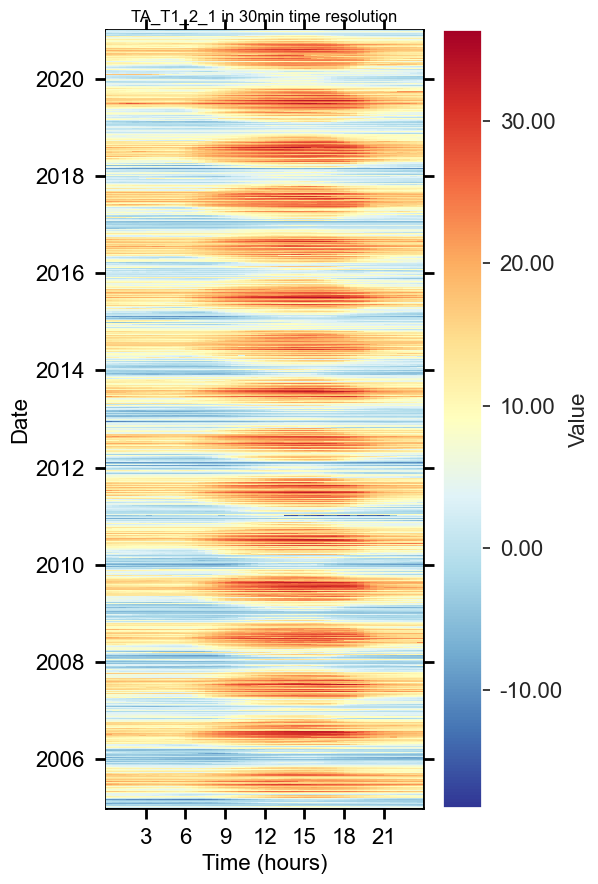

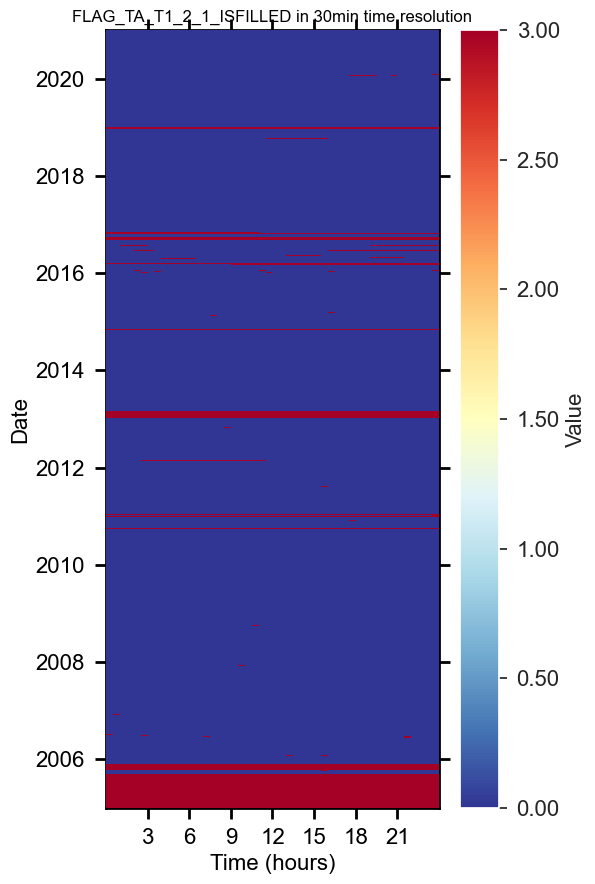

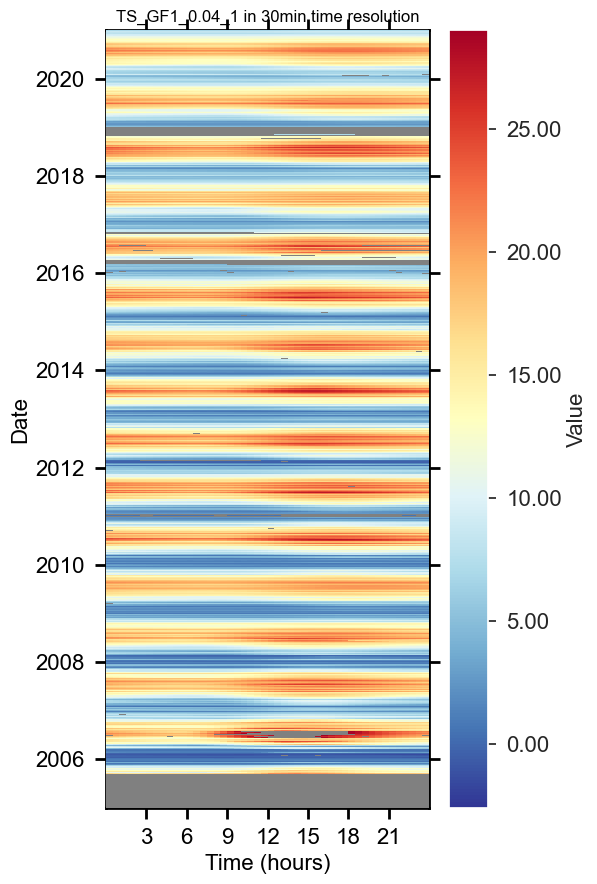

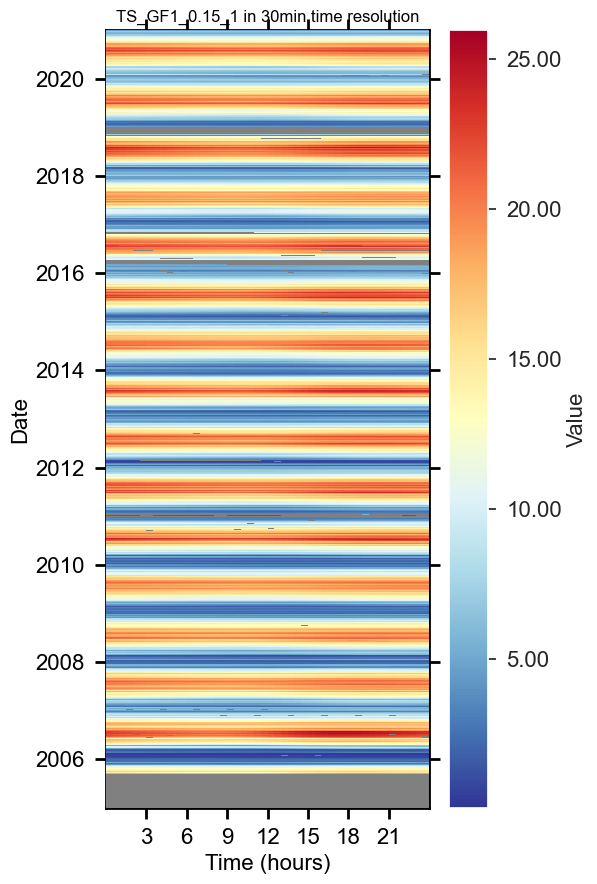

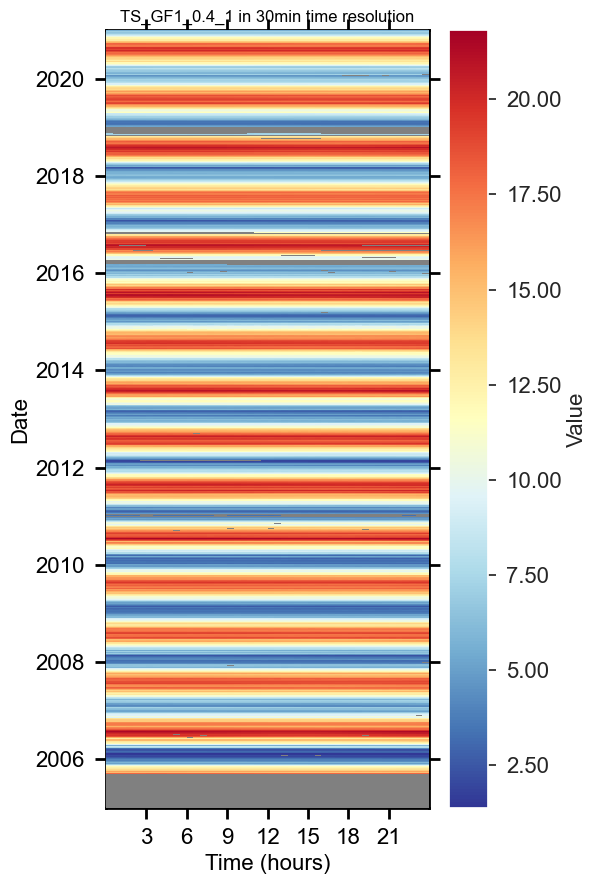

In [27]:
for col in data_simple_renamed_fw23.columns:
    series = data_simple_renamed_fw23[col]
    series.name = col
    HeatmapDateTime(series, figsize=(6, 9)).show()

</br>

# **Stats**

In [28]:
data_simple_renamed_fw23.describe()

,G_GF1_0.03_1,LW_IN_T1_2_1,LW_OUT_T1_2_1,PA_GF1_0.9_1,FLAG_PA_GF1_0.9_1_ISFILLED,PPFD_IN_T1_2_2,PREC_RAIN_TOT_GF1_0.5_1,FLAG_PREC_RAIN_TOT_GF1_0.5_1_ISFILLED,RH_T1_2_1,FLAG_RH_T1_2_1_ISFILLED,SWC_GF1_0.05_1,SWC_GF1_0.15_1,SWC_GF1_0.75_1,SW_IN_T1_2_1,FLAG_SW_IN_T1_2_1_ISFILLED,SW_OUT_T1_2_1,TA_T1_2_1,FLAG_TA_T1_2_1_ISFILLED,TS_GF1_0.04_1,TS_GF1_0.15_1,TS_GF1_0.4_1
count,257233.000000,264553.000000,264726.000000,275885.000000,280512.000000,265182.000000,280512.000000,280512.000000,280512.000000,280439.000000,255743.000000,261403.000000,261394.000000,280512.000000,280512.000000,265645.000000,280512.000000,280512.000000,261097.000000,261812.000000,261914.000000
mean,-1.294757,322.764134,363.862656,967.455135,0.697350,280.551417,0.064690,0.063266,83.921786,0.242998,50.799695,42.715561,43.008481,141.457347,0.188224,26.672217,9.865343,0.237284,11.635724,11.692454,11.546517
std,13.078049,43.931499,49.620005,8.000886,0.459406,467.401993,0.408662,0.243457,18.188887,0.428894,7.900669,4.602187,1.596751,235.038633,0.684141,49.826913,8.464063,0.809652,6.528476,6.248735,5.482197
min,-47.055000,162.974472,219.459778,926.800000,0.000000,-42.389820,0.000000,0.000000,9.561100,0.000000,24.511940,24.468729,37.764030,-0.158850,0.000000,-29.716660,-18.246000,0.000000,-2.576900,0.045730,1.378100
25%,-8.839500,295.478600,325.215393,962.900000,0.000000,-0.104510,0.000000,0.000000,72.523962,0.000000,47.020676,40.653645,41.844761,0.000000,0.000000,-3.722600,3.156075,0.000000,5.872834,5.830100,6.261362
50%,-4.027900,325.410523,357.583692,967.800000,1.000000,9.042426,0.000000,0.000000,91.100000,0.000000,53.084404,44.082874,42.524414,3.000000,0.000000,0.698370,9.589400,0.000000,11.853000,11.827865,11.589000
75%,3.322900,354.076446,393.994850,972.533333,1.000000,365.505924,0.000000,0.000000,99.659190,0.000000,56.925919,45.981319,43.705841,185.192501,0.000000,39.070100,15.896067,0.000000,17.216000,17.303924,16.733999
max,144.000000,454.941700,588.454834,1004.485000,1.000000,2306.300049,36.480904,2.000000,100.000000,1.000000,62.706470,50.708080,48.056732,1140.900024,3.000000,396.149994,36.348891,3.000000,29.000000,25.957001,21.813999


</br>

# **List of variables** (without flags)

In [32]:
[print(ix, c) for ix, c in enumerate(data_simple_renamed_fw23.columns) if not str(c).startswith("FLAG_")];

0 G_GF1_0.03_1
1 LW_IN_T1_2_1
2 LW_OUT_T1_2_1
3 PA_GF1_0.9_1
5 PPFD_IN_T1_2_2
6 PREC_RAIN_TOT_GF1_0.5_1
8 RH_T1_2_1
10 SWC_GF1_0.05_1
11 SWC_GF1_0.15_1
12 SWC_GF1_0.75_1
13 SW_IN_T1_2_1
15 SW_OUT_T1_2_1
16 TA_T1_2_1
18 TS_GF1_0.04_1
19 TS_GF1_0.15_1
20 TS_GF1_0.4_1


</br>

# **End of notebook**.

In [33]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished. {dt_string}")

Finished. 2024-09-02 12:09:20


</br>